# Using DNN to study the Ising model phase transition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle,os
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import sys, os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Using TensorFlow backend.


In [2]:
L = 40
samples_number = 10000
temperatures = np.arange(0.25, 4.01, 0.25)
dataset_size = 100000

In [3]:
data = pickle.load(open('Ising2DFM_reSample_L40_T=All.pkl','rb'))
X = np.unpackbits(data).astype(int).reshape(-1, L * L)

In [4]:
temp_val = np.hstack([np.repeat(temp, samples_number) for temp in temperatures])
train_idx = np.random.choice(X.shape[0], size=dataset_size, replace=False)

In [5]:
aux = np.arange(X.shape[0])
test_idx = np.asarray(list(set(aux).difference(set(train_idx))))

In [6]:
Y = np.zeros(temp_val.shape)
Y = np.where(temp_val < 2.2691, 1, Y)

In [7]:
x_train = X[train_idx]
y_label = Y[train_idx]
x_test = X[test_idx]
y_test = Y[test_idx]
del Y, X

In [8]:
#x_train = np.where(x_train==0, -1, x_train)

In [9]:
model = Sequential()
model.add(Dense(100, input_shape=(L * L, ), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               160100    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 160,201
Trainable params: 160,201
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train, y_label, validation_split=0.1, batch_size=64,
                    workers=8, use_multiprocessing=True, epochs=10)


Train on 90000 samples, validate on 10000 samples
Epoch 1/10
90000/90000 [==============================] - 3s 38us/step - loss: nan - accuracy: 0.7772 - val_loss: nan - val_accuracy: 0.5623
Epoch 2/10
90000/90000 [==============================] - 3s 35us/step - loss: nan - accuracy: 0.5640 - val_loss: nan - val_accuracy: 0.5623
Epoch 3/10
90000/90000 [==============================] - 3s 34us/step - loss: nan - accuracy: 0.5640 - val_loss: nan - val_accuracy: 0.5623
Epoch 4/10
90000/90000 [==============================] - 3s 34us/step - loss: nan - accuracy: 0.5640 - val_loss: nan - val_accuracy: 0.5623
Epoch 5/10
90000/90000 [==============================] - 3s 34us/step - loss: nan - accuracy: 0.5640 - val_loss: nan - val_accuracy: 0.5623
Epoch 6/10
90000/90000 [==============================] - 3s 35us/step - loss: nan - accuracy: 0.5640 - val_loss: nan - val_accuracy: 0.5623
Epoch 7/10
90000/90000 [==============================] - 3s 35us/step - loss: nan - accuracy: 0.5640 -

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)

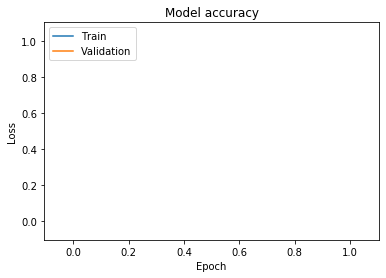

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

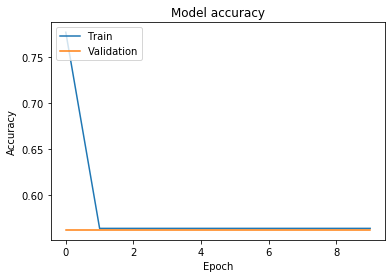

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
score[0], score[1]

(nan, 0.5603333115577698)